In [1]:
import os
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from community import community_louvain
import matplotlib.pyplot as plt

# Step 1: Load the text dataset
with open('/content/group.csv', 'r') as file:
    documents = file.readlines()


In [2]:
# Step 2: Preprocess the text data

# Step 3: Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)


In [3]:
# Step 4: Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5)  # Assuming 5 topics
lda.fit(X)

# Step 5: Extract topic distributions for documents
topic_dist = lda.transform(X)
topic_labels = topic_dist.argmax(axis=1)


In [4]:
# Step 6: Create a graph representation of the documents
G = nx.Graph()
for i, document in enumerate(documents):
    G.add_node(i, text=document, topic=topic_labels[i])

# Step 7: Apply the Louvain algorithm for community detection
partition = community_louvain.best_partition(G)
# Step 8: Visualize the graph with community colors
pos = nx.spring_layout(G)

# Get unique community labels
community_labels = set(partition.values())


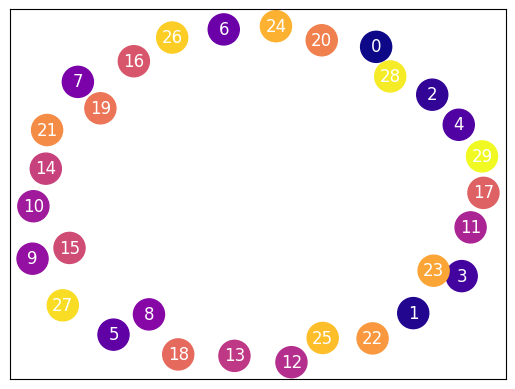

In [5]:
# Draw nodes with different community colors
node_colors = [partition[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='plasma', node_size=500)

# Draw edges with community colors
edge_colors = ['blue' if partition[edge[0]] != partition[edge[1]] else 'viridis' for edge in G.edges()]
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color=edge_colors)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_color='white')

# Show the plot
plt.axis('on')
plt.show()


In [6]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# Generate a random graph
G = nx.erdos_renyi_graph(50, 0.1)

# Apply the Louvain community detection algorithm
partition = community_louvain.best_partition(G)

# Create a layout for visualizing the graph
layout = nx.spring_layout(G)


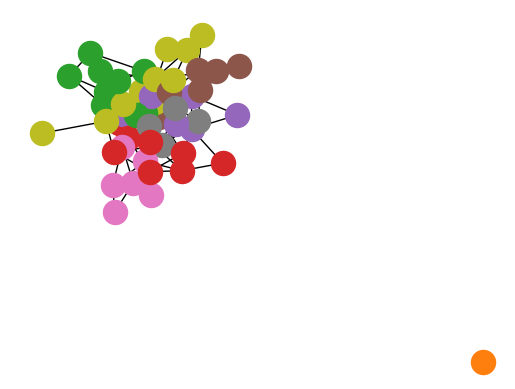

In [7]:
# Draw the nodes with community colors
for node, community_id in partition.items():
    nx.draw_networkx_nodes(G, layout, [node], node_color=f"C{community_id+1}")

# Draw the edges
nx.draw_networkx_edges(G, layout)

# Display the graph
plt.axis("off")
plt.show()

